# Projeto Automação Indicadores

### Descrição:

Há uma grande rede de lojas de roupa com 25 lojas espalhadas por todo o Brasil.

Todo dia, pela manhã, a equipe de análise de dados calcula os chamados One Pages e envia para o gerente de cada loja o OnePage da sua loja, bem como todas as informações usadas no cálculo dos indicadores.

Um One Page é um resumo muito simples e direto ao ponto, usado pela equipe de gerência de loja para saber os principais indicadores de cada loja e permitir em 1 página (daí o nome OnePage) tanto a comparação entre diferentes lojas, quanto quais indicadores aquela loja conseguiu cumprir naquele dia ou não.

Exemplo de OnePage:
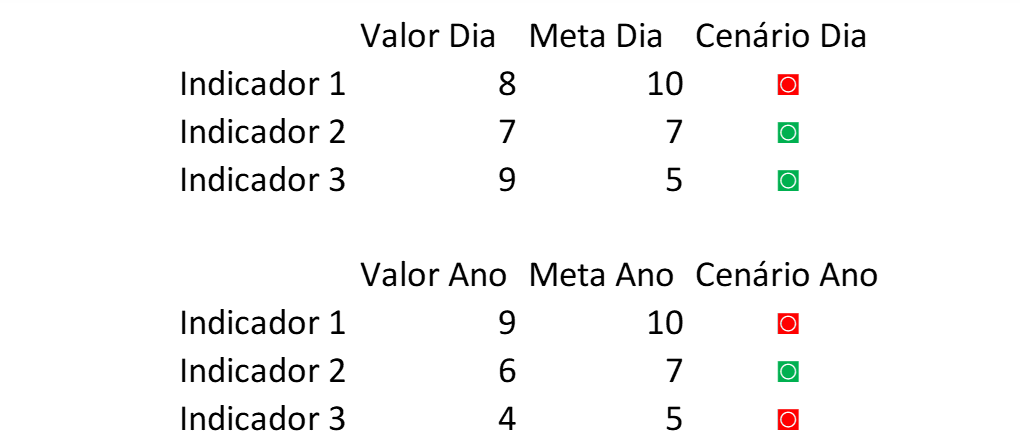

### Objetivo:
Criar um processo da forma mais automática possível para calcular o OnePage de cada loja e enviar um email para o gerente de cada loja com o seu OnePage no corpo do e-mail e também o arquivo completo com os dados da sua respectiva loja em anexo.

#### Indicadores do OnePage

- Faturamento -> Meta Ano: 1.650.000 / Meta Dia: 1000
- Diversidade de Produtos (quantos produtos diferentes foram vendidos naquele período) -> Meta Ano: 120 / Meta Dia: 4
- Ticket Médio por Venda -> Meta Ano: 500 / Meta Dia: 500

**Obs:** Cada indicador deve ser calculado no dia e no ano. O indicador do dia deve ser o do último dia disponível na planilha de Vendas (a data mais recente). As planilhas de cada loja devem ser salvas dentro da pasta da loja com a data da planilha, a fim de criar um histórico de backup.

Ex: O e-mail a ser enviado para o Gerente da Loja X deve ser como exemplo
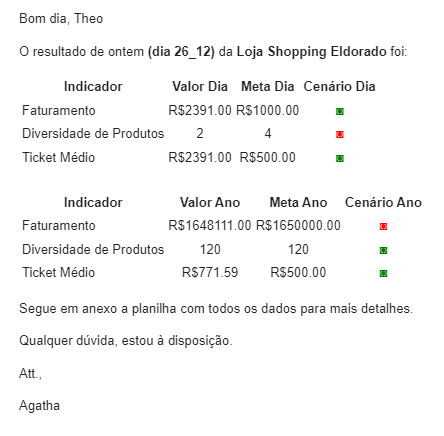

### Passos:
1. Importar arquivos e bibliotecas
2. Definir Criar uma Tabela para cada Loja e Definir o dia do Indicador
3. Salvar a planilha na pasta de backup
4. Calcular o indicador para 1 loja, depois para todas as lojas e enviar OnePage
5. Criar ranking para diretoria
6. Mandar email para diretoria

# Passo 1 - Importar Arquivos e Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import pathlib
import win32com.client as win32

# Passo 2 - Definir Criar uma Tabela para cada Loja e Definir o dia do Indicador

### Importando as bases de dados

In [2]:
emails = pd.read_excel(r'Bases de Dados\Emails.xlsx')
lojas = pd.read_csv(r'Bases de Dados\Lojas.csv', encoding='latin1', sep=';')
vendas = pd.read_excel(r'Bases de Dados\Vendas.xlsx')
display(emails)
display(lojas)
display(vendas)

,Loja,Gerente,E-mail
0,Iguatemi Esplanada,Helena,pythonimpressionador+helena@gmail.com
1,Shopping Midway Mall,Alice,pythonimpressionador+alice@gmail.com
2,Norte Shopping,Laura,pythonimpressionador+laura@gmail.com
3,Shopping Iguatemi Fortaleza,Manuela,pythonimpressionador+manuela@gmail.com
4,Shopping União de Osasco,Valentina,pythonimpressionador+valentina@gmail.com
5,Shopping Center Interlagos,Sophia,pythonimpressionador+sophia@gmail.com
6,Rio Mar Recife,Isabella,pythonimpressionador+isabella@gmail.com
7,Salvador Shopping,Heloisa,pythonimpressionador+heloisa@gmail.com
8,Rio Mar Shopping Fortaleza,Luiza,pythonimpressionador+luiza@gmail.com
9,Shopping Center Leste Aricanduva,Julia,pythonimpressionador+julia@gmail.com


,ID Loja,Loja
0,1,Iguatemi Esplanada
1,2,Shopping Midway Mall
2,3,Norte Shopping
3,4,Shopping Iguatemi Fortaleza
4,5,Shopping União de Osasco
5,6,Shopping Center Interlagos
6,7,Rio Mar Recife
7,8,Salvador Shopping
8,9,Rio Mar Shopping Fortaleza
9,10,Shopping Center Leste Aricanduva


,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
0,1,2019-01-01,1,Sapato Estampa,1,358,358
1,1,2019-01-01,1,Camiseta,2,180,360
2,1,2019-01-01,1,Sapato Xadrez,1,368,368
3,2,2019-01-02,3,Relógio,3,200,600
4,2,2019-01-02,3,Chinelo Liso,1,71,71
...,...,...,...,...,...,...,...
100994,69996,2019-12-26,17,Short Listrado,2,102,204
100995,69996,2019-12-26,17,Mochila,4,270,1080
100996,69996,2019-12-26,17,Pulseira Estampa,1,87,87
100997,69997,2019-12-26,11,Camisa Listrado,1,108,108


### Juntando a base de dados da loja com a base de vendas

In [3]:
vendas = vendas.merge(lojas, on='ID Loja')
display(vendas)

,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final,Loja
0,1,2019-01-01,1,Sapato Estampa,1,358,358,Iguatemi Esplanada
1,1,2019-01-01,1,Camiseta,2,180,360,Iguatemi Esplanada
2,1,2019-01-01,1,Sapato Xadrez,1,368,368,Iguatemi Esplanada
3,21,2019-01-02,1,Camisa Gola V Listrado,2,116,232,Iguatemi Esplanada
4,34,2019-01-02,1,Sapato Listrado,1,363,363,Iguatemi Esplanada
...,...,...,...,...,...,...,...,...
100994,69846,2019-12-25,8,Short Estampa,2,96,192,Salvador Shopping
100995,69846,2019-12-25,8,Tênis Estampa,5,256,1280,Salvador Shopping
100996,69850,2019-12-25,8,Calça Estampa,4,177,708,Salvador Shopping
100997,69972,2019-12-26,8,Terno Liso,3,720,2160,Salvador Shopping


### Criando uma tabela para cada loja

In [4]:
#o bom de criar um dicionário, é que não precisamos criar uma dataframe para cada loja manualmente.
#além disso, se uma loja já tiver no dicionário ele irá substituí-la, e se caso esta não existir, ele criará uma nova.
#para cada loja, para cada nome de loja, vamos filtrar os dados. Então, no nome de Shopping Midway Mall terá um dataframe só com informações referentes a este nome. 

dicionario_lojas = {}

for loja in lojas['Loja']:
    dicionario_lojas[loja] = vendas.loc[vendas['Loja']==loja, :] #linhas, colunas
    
display(dicionario_lojas['Shopping Midway Mall'])
display(dicionario_lojas['Rio Mar Recife'])

,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final,Loja
36382,12,2019-01-02,2,Short Xadrez,4,100,400,Shopping Midway Mall
36383,12,2019-01-02,2,Sunga Liso,2,114,228,Shopping Midway Mall
36384,33,2019-01-02,2,Camisa,1,100,100,Shopping Midway Mall
36385,33,2019-01-02,2,Meia Xadrez,3,41,123,Shopping Midway Mall
36386,48,2019-01-02,2,Cueca Linho,2,93,186,Shopping Midway Mall
...,...,...,...,...,...,...,...,...
40214,69914,2019-12-25,2,Short Liso,2,108,216,Shopping Midway Mall
40215,69914,2019-12-25,2,Cinto,5,200,1000,Shopping Midway Mall
40216,69919,2019-12-25,2,Cinto Xadrez,3,215,645,Shopping Midway Mall
40217,69929,2019-12-25,2,Meia Listrado,2,37,74,Shopping Midway Mall


,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final,Loja
72551,46,2019-01-02,7,Camisa,1,100,100,Rio Mar Recife
72552,46,2019-01-02,7,Calça Liso,2,190,380,Rio Mar Recife
72553,46,2019-01-02,7,Cinto,1,200,200,Rio Mar Recife
72554,87,2019-01-02,7,Camisa Estampa,1,113,113,Rio Mar Recife
72555,109,2019-01-02,7,Camisa Gola V Listrado,3,116,348,Rio Mar Recife
...,...,...,...,...,...,...,...,...
76645,69905,2019-12-25,7,Mochila Listrado,2,275,550,Rio Mar Recife
76646,69905,2019-12-25,7,Camisa Xadrez,3,105,315,Rio Mar Recife
76647,69905,2019-12-25,7,Tênis Liso,3,266,798,Rio Mar Recife
76648,69954,2019-12-25,7,Chinelo,3,60,180,Rio Mar Recife


### Definir o dia do Indicador. O último dia disponível na planilha de Vendas

In [5]:
dia_indicador = vendas.Data.max()
print(dia_indicador)
print(f'{dia_indicador.day}/{dia_indicador.month}')

2019-12-26 00:00:00
26/12


# Passo 3 - Salvar a planilha na pasta de backup
### Percorrendo a pasta de backup

In [6]:
#criar o caminho e os arquivos para cada loja
caminho_backup = pathlib.Path(r'Backup Arquivos Lojas')

arquivos_backup = caminho_backup.iterdir()
lista_lojas_backup = [arquivo.name for arquivo in arquivos_backup]

#verificar se a loja existe ou não, caso não exista, é preciso criá-l
for loja in dicionario_lojas:
    if loja not in lista_lojas_backup:
        nova_pasta = caminho_backup / loja #juntar caminhos
        nova_pasta.mkdir()

#salvar a planilha da loja em cada pasta:
    #local_arquivo = 'C:/Users../12_26_loja.xlsx'
    nome_arquivo = f'{dia_indicador.month}_{dia_indicador.day}_{loja}.xlsx'
    local_arquivo = caminho_backup / loja / nome_arquivo
    dicionario_lojas[loja].to_excel(local_arquivo)
    

# Passo 4 - Calcular o indicador para 1 loja, depois para todas as lojas, e enviar OnePage

### Metas

In [7]:
meta_faturmamento_ano = 1650000
meta_faturmamento_dia = 1000
meta_diversidade_ano = 120
meta_diversidade_dia = 4
meta_ticketmedio_ano = 500
meta_ticketmedio_dia = 500

- Dica para o caracter do sinal verde e vermelho: pegue o caracter desse site (https://fsymbols.com/keyboard/windows/alt-codes/list/)

In [11]:
for loja in dicionario_lojas:
    vendas_loja = dicionario_lojas[loja]
    vendas_loja_dia = vendas_loja.loc[vendas_loja['Data']==dia_indicador, :]

    #faturamento
    faturamento_ano = vendas_loja['Valor Final'].sum()
    faturamento_dia = vendas_loja_dia['Valor Final'].sum() #último dia

    #diversidade de produtos
    diversidade_ano = vendas_loja['Produto'].nunique()
    diversidade_dia = vendas_loja_dia['Produto'].nunique()

    #ticket médio por venda
    valor_por_venda = vendas_loja.groupby('Código Venda')['Valor Final'].sum()
    valor_por_venda_dia = vendas_loja_dia.groupby('Código Venda')['Valor Final'].sum()

    ticket_medio_ano = valor_por_venda.mean()
    ticket_medio_dia = valor_por_venda_dia.mean()
    
    #email
    outlook = win32.Dispatch('outlook.application')

    nome = emails.loc[emails['Loja']==loja, 'Gerente'].values[0]
    mail = outlook.CreateItem(0)
    mail.To = emails.loc[emails['Loja']==loja, 'E-mail'].values[0]
    mail.Subject = f'OnePage Dia {dia_indicador.day}/{dia_indicador.month} - Loja {loja}'

    if faturamento_dia >= meta_faturmamento_dia:
        cor_fat_dia = 'green'
    else:
        cor_fat_dia = 'red'
    if faturamento_ano >= meta_faturmamento_ano:
        cor_fat_ano = 'green'
    else:
        cor_fat_ano = 'red'  
    if diversidade_dia >= meta_diversidade_dia:
        cor_div_dia = 'green'
    else:
        cor_div_dia = 'red'
    if diversidade_ano >= meta_diversidade_ano:
        cor_div_ano = 'green'
    else:
        cor_div_ano = 'red'
    if ticket_medio_dia >= meta_ticketmedio_dia:
        cor_ticket_dia = 'green'
    else:
        cor_ticket_dia = 'red'
    if ticket_medio_ano >= meta_ticketmedio_ano:
        cor_ticket_ano = 'green'
    else:
        cor_ticket_ano = 'red'

    mail.HTMLBody = f'''  
    <p>Bom dia, {nome}</p>

    <p>O resultado de ontem <strong>(dia {dia_indicador.day}_{dia_indicador.month})</strong> da <strong>Loja {loja}</strong> foi:</p>

    <table>
      <tr>
        <th>Indicador</th>
        <th>Valor Dia</th>
        <th>Meta Dia</th>
        <th>Cenário Dia</th>
      </tr>
      <tr>
        <td>Faturamento</td>
        <td style="text-align: center">R${faturamento_dia:.2f}</td>
        <td style="text-align: center">R${meta_faturmamento_dia:.2f}</td>
        <td style="text-align: center"><font color="{cor_fat_dia}">◙</font></td>
      </tr>
      <tr>
        <td>Diversidade de Produtos</td>
        <td style="text-align: center">{diversidade_dia}</td>
        <td style="text-align: center">{meta_diversidade_dia}</td>
        <td style="text-align: center"><font color="{cor_div_dia}">◙</font></td>
      </tr>
      <tr>
        <td>Ticket Médio</td>
        <td style="text-align: center">R${ticket_medio_dia:.2f}</td>
        <td style="text-align: center">R${meta_ticketmedio_dia:.2f}</td>
        <td style="text-align: center"><font color="{cor_ticket_dia}">◙</font></td>
      </tr>
    </table>
    <br>
    <table>
      <tr>
        <th>Indicador</th>
        <th>Valor Ano</th>
        <th>Meta Ano</th>
        <th>Cenário Ano</th>
      </tr>
      <tr>
        <td>Faturamento</td>
        <td style="text-align: center">R${faturamento_ano:.2f}</td>
        <td style="text-align: center">R${meta_faturmamento_ano:.2f}</td>
        <td style="text-align: center"><font color="{cor_fat_ano}">◙</font></td>
      </tr>
      <tr>
        <td>Diversidade de Produtos</td>
        <td style="text-align: center">{diversidade_ano}</td>
        <td style="text-align: center">{meta_diversidade_ano}</td>
        <td style="text-align: center"><font color="{cor_div_ano}">◙</font></td>
      </tr>
      <tr>
        <td>Ticket Médio</td>
        <td style="text-align: center">R${ticket_medio_ano:.2f}</td>
        <td style="text-align: center">R${meta_ticketmedio_ano:.2f}</td>
        <td style="text-align: center"><font color="{cor_ticket_ano}">◙</font></td>
      </tr>
    </table>

    <p>Segue em anexo a planilha com todos os dados para mais detalhes.</p>

    <p>Qualquer dúvida, estou à disposição.</p>

    <p>Att.,</p>

    <p>Ágatha</p>

    '''
    attachment  = pathlib.Path.cwd() / caminho_backup / loja / f'{dia_indicador.month}_{dia_indicador.day}_{loja}.xlsx'
    mail.Attachments.Add(str(attachment))

    mail.Send()
    print('E-mail da Loja {} enviado'.format(loja))

E-mail da Loja Iguatemi Esplanada enviado
E-mail da Loja Shopping Midway Mall enviado
E-mail da Loja Norte Shopping enviado
E-mail da Loja Shopping Iguatemi Fortaleza enviado
E-mail da Loja Shopping União de Osasco enviado
E-mail da Loja Shopping Center Interlagos enviado
E-mail da Loja Rio Mar Recife enviado
E-mail da Loja Salvador Shopping enviado
E-mail da Loja Rio Mar Shopping Fortaleza enviado
E-mail da Loja Shopping Center Leste Aricanduva enviado
E-mail da Loja Ribeirão Shopping enviado
E-mail da Loja Shopping Morumbi enviado
E-mail da Loja Parque Dom Pedro Shopping enviado
E-mail da Loja Bourbon Shopping SP enviado
E-mail da Loja Palladium Shopping Curitiba enviado
E-mail da Loja Passei das Águas Shopping enviado
E-mail da Loja Center Shopping Uberlândia enviado
E-mail da Loja Shopping Recife enviado
E-mail da Loja Shopping Vila Velha enviado
E-mail da Loja Shopping SP Market enviado
E-mail da Loja Shopping Eldorado enviado
E-mail da Loja Shopping Ibirapuera enviado
E-mail da L

# Passo 5 - Criar ranking para diretoria

In [9]:
#ano
faturamento_lojas_ano = vendas.groupby('Loja')[['Loja', 'Valor Final']].sum().sort_values(by='Valor Final', ascending=False)
display(faturamento_lojas_ano)

novo_arquivo = '{}_{}_Ranking Anual.xlsx'.format(dia_indicador.month, dia_indicador.day)
faturamento_lojas_ano.to_excel(r'Backup Arquivos Lojas\{}'.format(novo_arquivo))

#dia
vendas_dia = vendas.loc[vendas['Data']==dia_indicador, :]
faturamento_lojas_dia = vendas_dia.groupby('Loja')[['Loja', 'Valor Final']].sum().sort_values(by='Valor Final', ascending=False)
display(faturamento_lojas_dia)

novo_arquivo = '{}_{}_Ranking Diário.xlsx'.format(dia_indicador.month, dia_indicador.day)
faturamento_lojas_dia.to_excel(r'Backup Arquivos Lojas\{}'.format(novo_arquivo))

,Valor Final
Loja,
Iguatemi Campinas,1762419
Shopping Vila Velha,1731167
Bourbon Shopping SP,1726110
Rio Mar Recife,1722766
Shopping SP Market,1721763
Palladium Shopping Curitiba,1721120
Norte Shopping,1711968
Ribeirão Shopping,1707122
Iguatemi Esplanada,1699681


,Valor Final
Loja,
Salvador Shopping,3950
Novo Shopping Ribeirão Preto,3400
Center Shopping Uberlândia,2651
Shopping Eldorado,2391
Shopping Center Interlagos,1582
Shopping Recife,1366
Norte Shopping,1259
Shopping União de Osasco,1207
Shopping Vila Velha,937


# Passo 6 - Mandar email para diretoria

In [10]:
outlook = win32.Dispatch('outlook.application')

mail = outlook.CreateItem(0)
mail.To = emails.loc[emails['Loja']=='Diretoria', 'E-mail'].values[0]
mail.Subject = f'Ranking Lojas {dia_indicador.day}/{dia_indicador.month}'
mail.Body = f'''
Prezados, bom dia

Melhor loja do dia: Loja {faturamento_lojas_dia.index[0]} com faturamento de R${faturamento_lojas_dia.iloc[0,0]:.2f}
Pior loja do dia: Loja {faturamento_lojas_dia.index[-1]} com faturamento de R${faturamento_lojas_dia.iloc[-1,0]:.2f}

Melhor loja do ano: Loja {faturamento_lojas_ano.index[0]} com faturamento de R${faturamento_lojas_ano.iloc[0,0]:.2f}
Pior loja do ano: Loja {faturamento_lojas_ano.index[-1]} com faturamento de R${faturamento_lojas_ano.iloc[-1,0]:.2f}

Segue em anexo o Ranking do ano e do dia de todas as lojas.

Qualquer dúvida estou à disposição.

Att.,
Ágatha
'''

attachment  = pathlib.Path.cwd() / caminho_backup / f'{dia_indicador.month}_{dia_indicador.day}_Ranking Anual.xlsx'
mail.Attachments.Add(str(attachment))

attachment  = pathlib.Path.cwd() / caminho_backup / f'{dia_indicador.month}_{dia_indicador.day}_Ranking Diário.xlsx'
mail.Attachments.Add(str(attachment))

mail.Send()
print('E-mail da Diretoria enviado')

E-mail da Diretoria enviado
